Bonjour, voici mon TD avec les petits poissons chat 🙀

<Axes: xlabel='Date'>

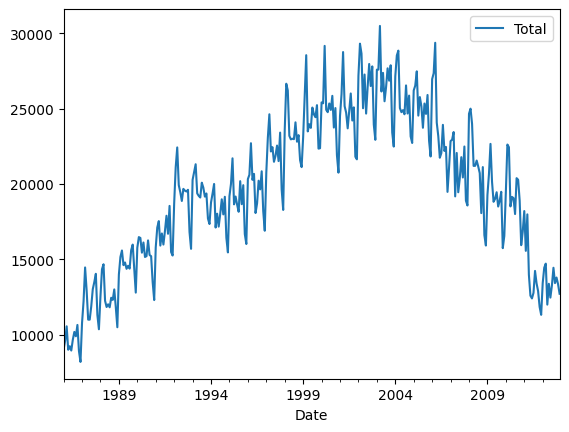

In [10]:
#Tracer la courbe de vente de poisson-chats :

import pandas

catfish = pandas.read_csv('data/catfish.csv', index_col='Date', parse_dates=True)
catfish.plot()

Text(0.5, 1.0, 'Ventes entre 1996 et 2000 😁')

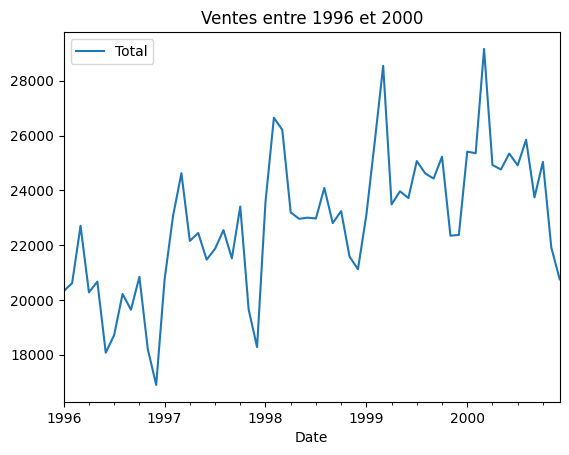

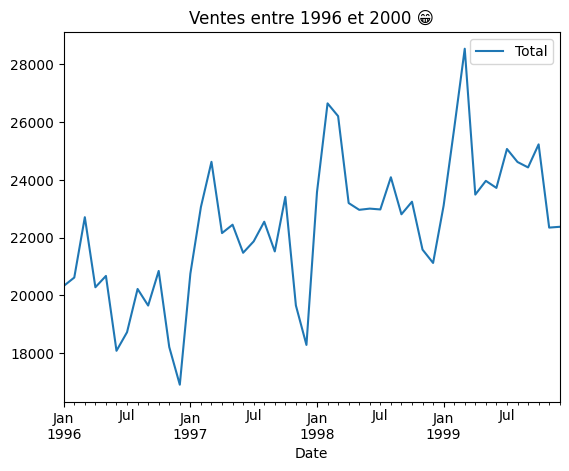

In [4]:
#Tracer la courbe de vente de 1996 à 2000

ax = catfish.loc['1996':'2000'].plot()
ax.set_title("Ventes entre 1996 et 2000")

#ou

bx = catfish.loc['1996':'1999'].plot()
bx.set_title("Ventes entre 1996 et 2000 😁")

In [5]:
# Moyenne des ventes sur l'année 1992
moyenne_92 = catfish.loc['1992', 'Total'].mean()

# Moyenne des ventes sur la décennie 90 (de 1990 à 1999)
moyenne_decennie_90 = catfish.loc['1990':'1999', 'Total'].mean()

# Moyenne des ventes sur l'ensemble du dataset
moyenne_total = catfish['Total'].mean()

print("Moyenne des ventes en 1992 :", moyenne_92)
print("Moyenne des ventes sur la décennie 90 :", moyenne_decennie_90)
print("Moyenne des ventes sur l'ensemble du dataset :", moyenne_total)

Moyenne des ventes en 1992 : 19278.0
Moyenne des ventes sur la décennie 90 : 19701.808333333334
Moyenne des ventes sur l'ensemble du dataset : 19643.984567901236


In [6]:
# Médiane des ventes pour l'année 1992
mediane_92 = catfish.loc['1992', 'Total'].median()

# Médiane des ventes pour la décennie 90 (de 1990 à 1999)
mediane_decennie_90 = catfish.loc['1990':'1999', 'Total'].median()

# Médiane des ventes pour l'ensemble du dataset
mediane_total = catfish['Total'].median()

print("Médiane des ventes en 1992 :", mediane_92)
print("Médiane des ventes sur la décennie 90 :", mediane_decennie_90)
print("Médiane des ventes sur l'ensemble du dataset :", mediane_total)

Médiane des ventes en 1992 : 19529.5
Médiane des ventes sur la décennie 90 : 19477.0
Médiane des ventes sur l'ensemble du dataset : 19660.5


In [7]:
# Mode des ventes pour l'année 1992
mode_92 = catfish.loc['1992', 'Total'].mode()

# Mode des ventes pour la décennie 90 (de 1990 à 1999)
mode_decennie_90 = catfish.loc['1990':'1999', 'Total'].mode()

# Mode des ventes sur l'ensemble du dataset
mode_total = catfish['Total'].mode()

print("Mode des ventes en 1992 :", mode_92.values)
print("Mode des ventes sur la décennie 90 :", mode_decennie_90.values) #Pourquoi sur 10 ans il y en a plein ? et plus que sur tout le dataset ?
print("Mode des ventes sur l'ensemble du dataset :", mode_total.values)

Mode des ventes en 1992 : [15698 16814 18698 18874 19454 19500 19559 19615 19676 19923 21100 22425]
Mode des ventes sur la décennie 90 : [12300 13488 15158 15212 15214 15253 15287 15444 15461 15486 15698 15771
 15794 15914 15983 16018 16118 16257 16420 16427 16476 16680 16697 16716
 16814 16878 16898 17112 17113 17173 17342 17536 17709 17893 17983 18024
 18027 18074 18157 18204 18278 18546 18631 18649 18660 18698 18719 18772
 18874 18983 19103 19151 19162 19169 19191 19211 19363 19371 19377 19454
 19500 19559 19615 19642 19645 19676 19758 19920 19923 20001 20008 20086
 20187 20217 20273 20276 20322 20613 20669 20746 20774 20842 21100 21119
 21309 21471 21518 21581 21702 21866 22154 22344 22372 22425 22444 22548
 22704 22805 22960 22973 23002 23058 23107 23195 23241 23408 23488 23576
 23720 23964 24089 24430 24618 24624 25069 25229 25780 26207 26650 28544]
Mode des ventes sur l'ensemble du dataset : [15158 18204 19451]


In [8]:
# Écart-type des ventes pour l'année 1992
ecart_type_92 = catfish.loc['1992', 'Total'].std()

# Écart-type des ventes pour la décennie 90 (de 1990 à 1999)
ecart_type_decennie_90 = catfish.loc['1990':'1999', 'Total'].std()

# Écart-type des ventes sur l'ensemble du dataset
ecart_type_total = catfish['Total'].std()

print("Écart-type des ventes en 1992 :", ecart_type_92)
print("Écart-type des ventes sur la décennie 90 :", ecart_type_decennie_90)
print("Écart-type des ventes sur l'ensemble du dataset :", ecart_type_total)

Écart-type des ventes en 1992 : 1744.0241866546357
Écart-type des ventes sur la décennie 90 : 3063.0951647255865
Écart-type des ventes sur l'ensemble du dataset : 5039.32433149796


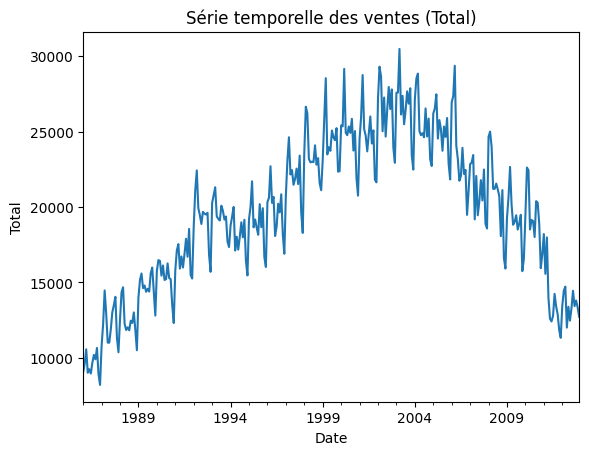

Statistique ADF : -1.5899031233340146
p-value : 0.48866351571884037
Valeurs critiques :
   1%: -3.452
   5%: -2.871
   10%: -2.572
=> La série n'est pas stationnaire (p-value >= 0.05)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

catfish = pd.read_csv('data/catfish.csv', index_col='Date', parse_dates=True)
series = catfish['Total']

series.plot(title="Série temporelle des ventes (Total)")
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

result = adfuller(series.dropna())

print("Statistique ADF :", result[0])
print("p-value :", result[1])
print("Valeurs critiques :")
for key, value in result[4].items():
    print(f"   {key}: {value:.3f}")

if result[1] < 0.05:
    print("=> La série est stationnaire (p-value < 0.05)")
else:
    print("=> La série n'est pas stationnaire (p-value >= 0.05)")

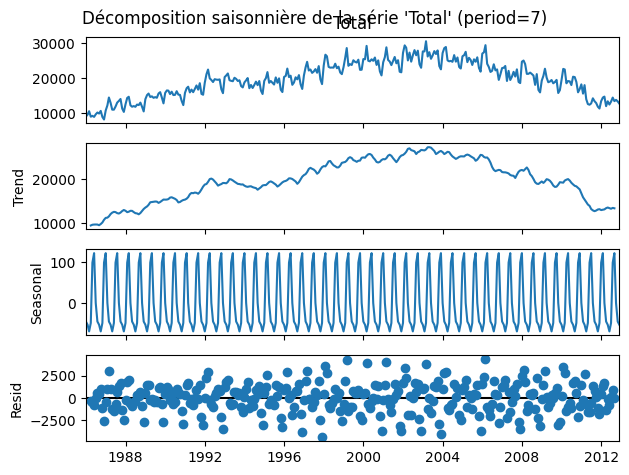

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

catfish = pd.read_csv('data/catfish.csv', index_col='Date', parse_dates=True)
series = catfish['Total']

decomposition = seasonal_decompose(series, model='additive', period=7)

decomposition.plot()
plt.suptitle("Décomposition saisonnière de la série 'Total' (period=7)")
plt.show()

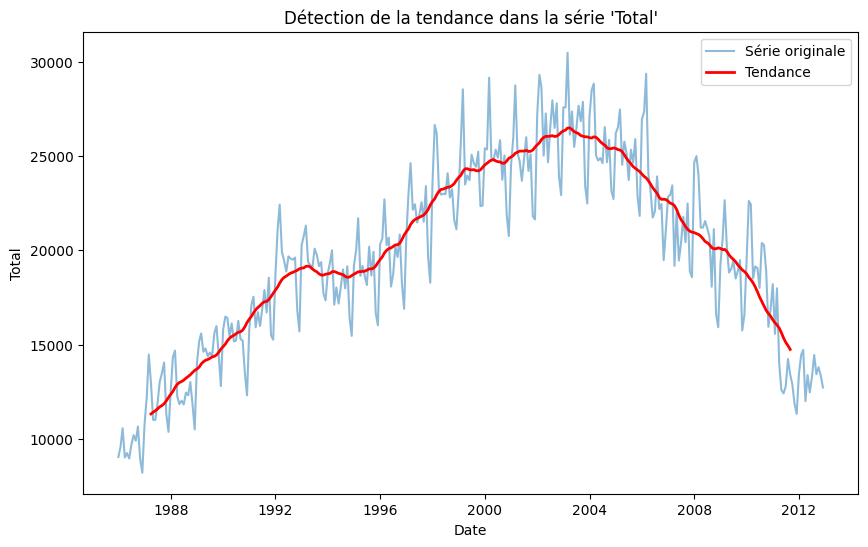

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

catfish = pd.read_csv('data/catfish.csv', index_col='Date', parse_dates=True)
series = catfish['Total']
decomposition = seasonal_decompose(series, model='additive', period=30)
trend = decomposition.trend

plt.figure(figsize=(10, 6))
plt.plot(series, label="Série originale", alpha=0.5)
plt.plot(trend, label="Tendance", linewidth=2, color='red')
plt.title("Détection de la tendance dans la série 'Total'")
plt.xlabel("Date")
plt.ylabel("Total")
plt.legend()
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

data = pd.read_csv('data/catfish.csv', index_col='Date', parse_dates=True)
train = data.loc['1986':'2000']['Total']
test = data.loc['2001':'2012']['Total']

model = pm.auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
forecast = model.predict(n_periods=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Données 1986-2000')
plt.plot(test.index, test, label='Données réelles 2001-2012', color='blue')
plt.plot(test.index, forecast, label='Prévision', color='red')
plt.title("Prévision des ventes de 2001 à 2012 avec pmdarima")
plt.xlabel("Date")
plt.ylabel("Total")
plt.legend()
plt.show()

def mse(actual, predicted):
    return ((actual - predicted) ** 2).mean()

def mae(actual, predicted):
    return (abs(actual - predicted)).mean()

print("MSE :", mse(test, forecast))
print("MAE :", mae(test, forecast))

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
import pandas as pd
import pmdarima as pm

data = pd.read_csv('data/catfish.csv', index_col='Date', parse_dates=True)
train = data.loc['1986':'2000']['Total']
model = pm.auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject